ARIMA model - In this code is using ARIMA model on Car Sales input data. Before getting into ARIMA model, two factors that 
decide upon which ARIMA model to choose will be discussed in detail.  ACF and PACF are the two factors which will help us decide ARIMA model. 

What is ARIMA?  

Lets split like this:  

AR - Auto Regressive
I - Differencing
MA - Moving Average

AR - This is something simiar to Linear Regression where in Linear Regression we will have regression between Dependent and Independent variables.  Here to understand the timeseries, variable will be correlated with the self previous time. That's why
this is called Auto Regression. 

MA - Moving Average tells moving average of the data for the given window width. 

Most of the data will either using AR or MA and sometimes both the models will be used for forecasting.  How do you define the model? Here comes ACF which is called Auto Correlation and PACF which is partial auto correlation. 

Auto correlation is how an observation at time t is correlated with time t-1 and so on. We call this as lag which is nothing but correlation between two consecutive time.  If the correlation is between t and t-1, then we call it as lag 1.  t and t-2 we call it as lag 2 and so on. 

Partial correlation is basically a auto regression of given time period. What is the direct effect of observation at time t-n on t without worrying about the other observation.  This is to find which lag will have better predictor for time t.  This can be calculated using regression formula except that we will use the same observation for both Independent and Dependent variables. 

Obs(t) = (Constant) Obs(t-1) + (Constant) Obs(t-2) + ... (Constant) Obs(t-n) + error_term

Lets not get deep into the writeup instead we will start putting the pieces into the code to understand the concept
practically using our Car Sales input data. 

NOTE: This code have different ACF and PACF plots with different lags. Though this code containt ARIMA model in the end, the main purpose is to show how the ACF and PACF plots with different inputs and lags.  That shows plots change depends on the size of the input.  ARIMA_MODEL.ipynb is having the actual ARIMA models using Train/Test and Forecast of Car Sales Data.

           Month  Sales
Month                  
1960-01  1960-01   6550
1960-02  1960-02   8728
1960-03  1960-03  12026
1960-04  1960-04  14395
1960-05  1960-05  14587
...          ...    ...
1968-08  1968-08  16722
1968-09  1968-09  14385
1968-10  1968-10  21342
1968-11  1968-11  17180
1968-12  1968-12  14577

[108 rows x 2 columns]


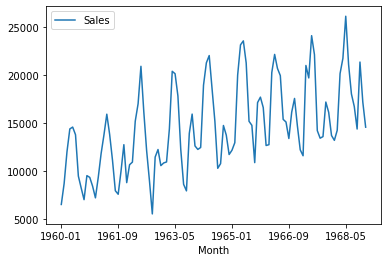

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import pacf
from matplotlib import pyplot as plt
from sklearn import model_selection as skl
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

path = 'monthly-car-sales.csv'
df = pd.read_csv(path, header=0)


df.index = df['Month']
df.drop('Unnamed: 0',axis =1 , inplace=True)


print(df)


df.plot()
plt.show()

I am trying to find how the pacf varies with the size of the data and the lags. Below I tried various lags with full data and
train and test split data.  This part of the code doesn't contribute to the ARIMA model decision but for understanding to see what the pacf at different lags and data. 

In [3]:
x = pacf(df['Sales'], nlags=20)
print(x)

[ 1.          0.72383481 -0.33358648 -0.08601433  0.27086804  0.21521762
 -0.2468014  -0.05192987  0.01127701  0.37858294  0.43348101  0.48965689
  0.27938183 -0.4984972  -0.3591058  -0.12577467 -0.07837002  0.431973
 -0.20929353  0.00445164 -0.29318026]


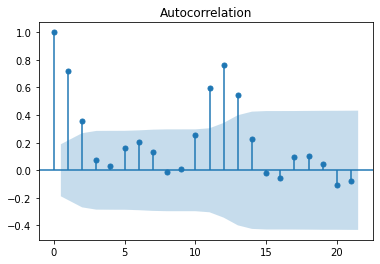

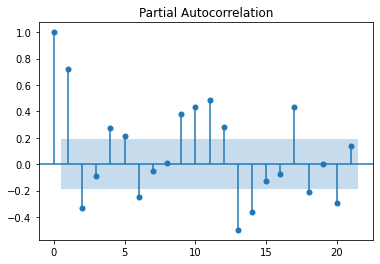

In [4]:
plot_acf(df['Sales'])
plt.show()

plot_pacf(df['Sales'])
plt.show()

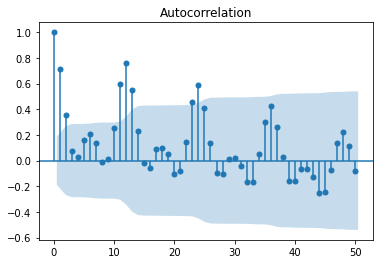

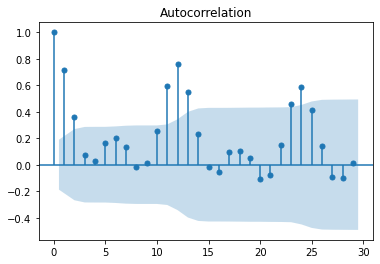

In [5]:
plot_acf(df['Sales'],lags=50)
plt.show()

plot_acf(df['Sales'],lags=29)
plt.show()

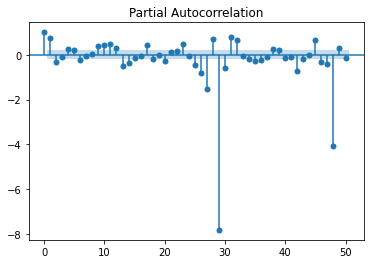

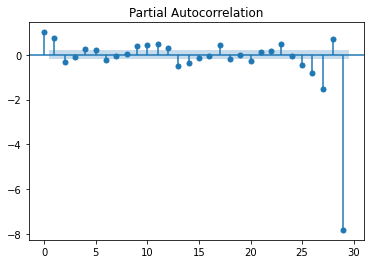

In [6]:
plot_pacf(df['Sales'],lags=50)
plt.show()

plot_pacf(df['Sales'],lags=29)
plt.show()

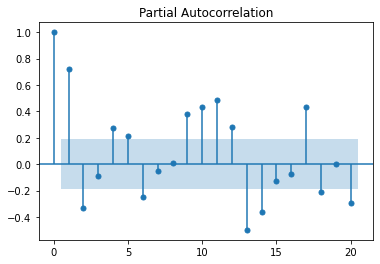

In [7]:
plot_pacf(df['Sales'],lags=20)
plt.show()

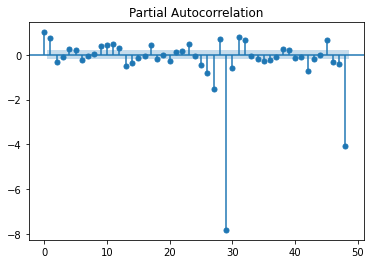

In [8]:
plot_pacf(df['Sales'],lags=48)
plt.show()

In [9]:
train_data_size = round(len(df['Sales'])*.70)
train_data = df.iloc[:train_data_size]
test_data = df.iloc[train_data_size:]
print(len(train_data))
print(len(test_data))

76
32


In [10]:
train_data_pacf = pacf(train_data['Sales'], nlags=37)
print(train_data_pacf)
print(pacf(df['Sales'], nlags=29))
print(pacf(df['Sales'], nlags=48))


[ 1.          0.70660063 -0.42394086 -0.00578119  0.22826008  0.04540558
 -0.13935004 -0.10245862  0.1085762   0.22224917  0.44764101  0.50532763
  0.32586685 -0.24561639 -0.39070891 -0.30879745 -0.62363535  0.14396751
 -0.02755813  0.32475514  0.07666855 -0.14556018 -0.8282691  -0.3588639
  3.16732125 -0.35086195  1.80554087  0.6530054   0.83901077 -0.52709191
  0.03923561 -1.23306844 -0.24521743  2.91149406  0.17854337  1.28337295
  0.33146863 -2.12463684]
[ 1.00000000e+00  7.23834813e-01 -3.33586484e-01 -8.60143286e-02
  2.70868042e-01  2.15217620e-01 -2.46801399e-01 -5.19298743e-02
  1.12770141e-02  3.78582936e-01  4.33481011e-01  4.89656885e-01
  2.79381826e-01 -4.98497195e-01 -3.59105801e-01 -1.25774673e-01
 -7.83700245e-02  4.31973004e-01 -2.09293526e-01  4.45163811e-03
 -2.93180261e-01  1.41107306e-01  1.86715479e-01  4.63891791e-01
 -6.45643042e-02 -4.73065673e-01 -7.97600922e-01 -1.54489058e+00
  6.96093829e-01 -7.80574915e+00]
[ 1.00000000e+00  7.23834813e-01 -3.33586484e-01

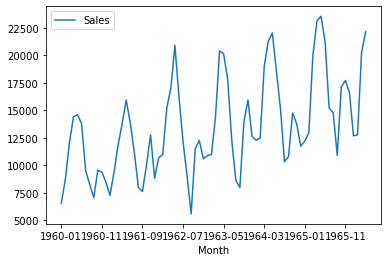

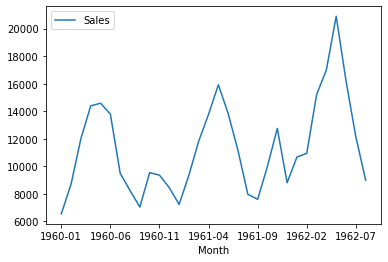

In [11]:
train_data.plot()
plt.show()

test_data.plot()
plt.show()

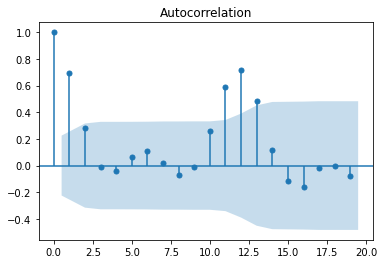

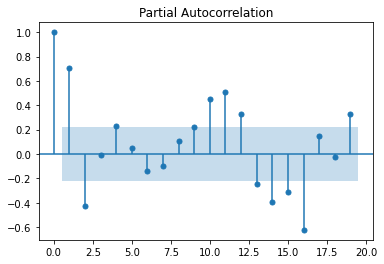

In [12]:
plot_acf(train_data['Sales'])
plt.show()

plot_pacf(train_data['Sales'])
plt.show()

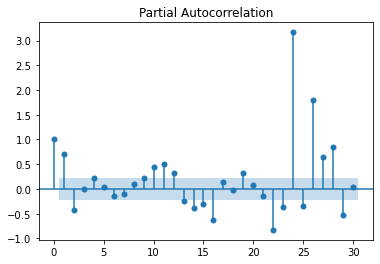

In [13]:
plot_pacf(train_data['Sales'],lags=30)
plt.show()

The following table summarizes how we use the sample autocorrelation function for model identification.

    SHAPE                            INDICATED MODEL
    
Exponential, 
decaying to zero                     Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model.

Alternating positive and 
negative, decaying to zero           Autoregressive model. Use the partial autocorrelation plot to help identify the order.

One or more spikes, 
rest are essentially zero            Moving average model, order identified by where plot becomes zero.

Decay, starting after a few lags     Mixed autoregressive and moving average model.

All zero or close to zero            Data is essentially random.

High values at fixed intervals       Include seasonal autoregressive term.

No decay to zero                     Series is not stationary.


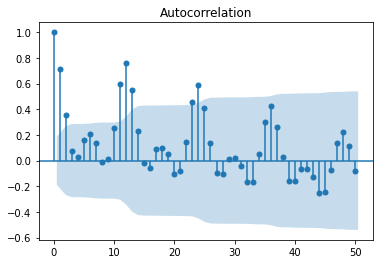

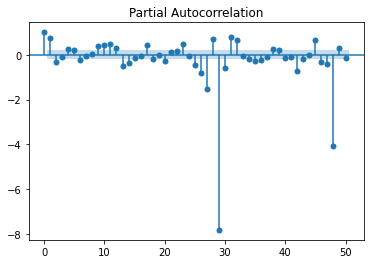

In [16]:
plot_acf(df['Sales'],lags=50)
plt.show()

plot_pacf(df['Sales'],lags=50)
plt.show()

ARIMA model assumes the data to be stationary.  As our input data is not stationary, it has to be made stationary first. When I tried to do differencing with time period as 12, the plot looks kind of stationary. 

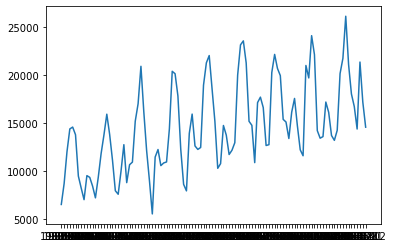

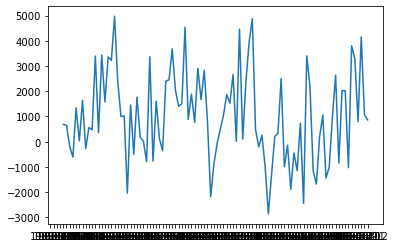

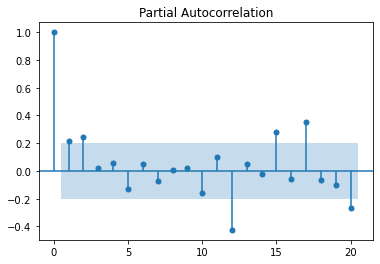

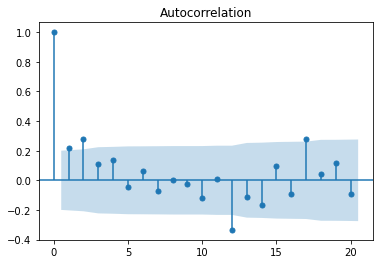

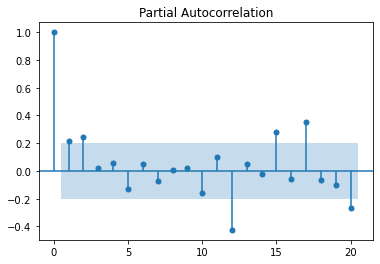

In [79]:
diff = df['Sales'].diff(12)


plt.plot(df['Sales'])
plt.show()


plt.plot(diff)
plt.show()


diff_1 = diff.dropna()


plot_acf(diff_1,lags=20)
plot_pacf(diff_1,lags=20)

In [17]:
from statsmodels.tsa.stattools import adfuller

output = adfuller(diff[1:])
print(output)
print('ADF Statistics: %f' %output[0])


(-6.199799230800693, 5.84475259927691e-08, 11, 95, {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}, 1654.0334866146452)
ADF Statistics: -6.199799


acf is showing exponential and decaying lag to zero which shows AR model. ACF of first differencing is showing positive autocorrelation at lag 1. And PACF is showing significant lag for 2 month. 
Start with I would go for AR(1) which will be ARIMA(1,1,0). Later we will use Grid Search to adjust the hyperparameter for the best forecasting result. 

In [111]:
model = ARIMA(df['Sales'],order=(12,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(24)
print(forecast)

1969-01-01    13161.913913
1969-02-01    14089.600835
1969-03-01    19443.978920
1969-04-01    21938.297544
1969-05-01    24879.268815
1969-06-01    20693.248987
1969-07-01    18446.837609
1969-08-01    16021.938288
1969-09-01    16476.541113
1969-10-01    20462.089561
1969-11-01    16906.175651
1969-12-01    15520.913928
1970-01-01    13070.214795
1970-02-01    14530.697435
1970-03-01    18985.756445
1970-04-01    21851.415860
1970-05-01    23918.309925
1970-06-01    20496.985744
1970-07-01    18358.976832
1970-08-01    16143.264291
1970-09-01    17672.884132
1970-10-01    19670.003122
1970-11-01    17244.639658
1970-12-01    15831.397526
Freq: MS, Name: predicted_mean, dtype: float64


            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587
...           ...
1968-08-01  16722
1968-09-01  14385
1968-10-01  21342
1968-11-01  17180
1968-12-01  14577

[108 rows x 1 columns]


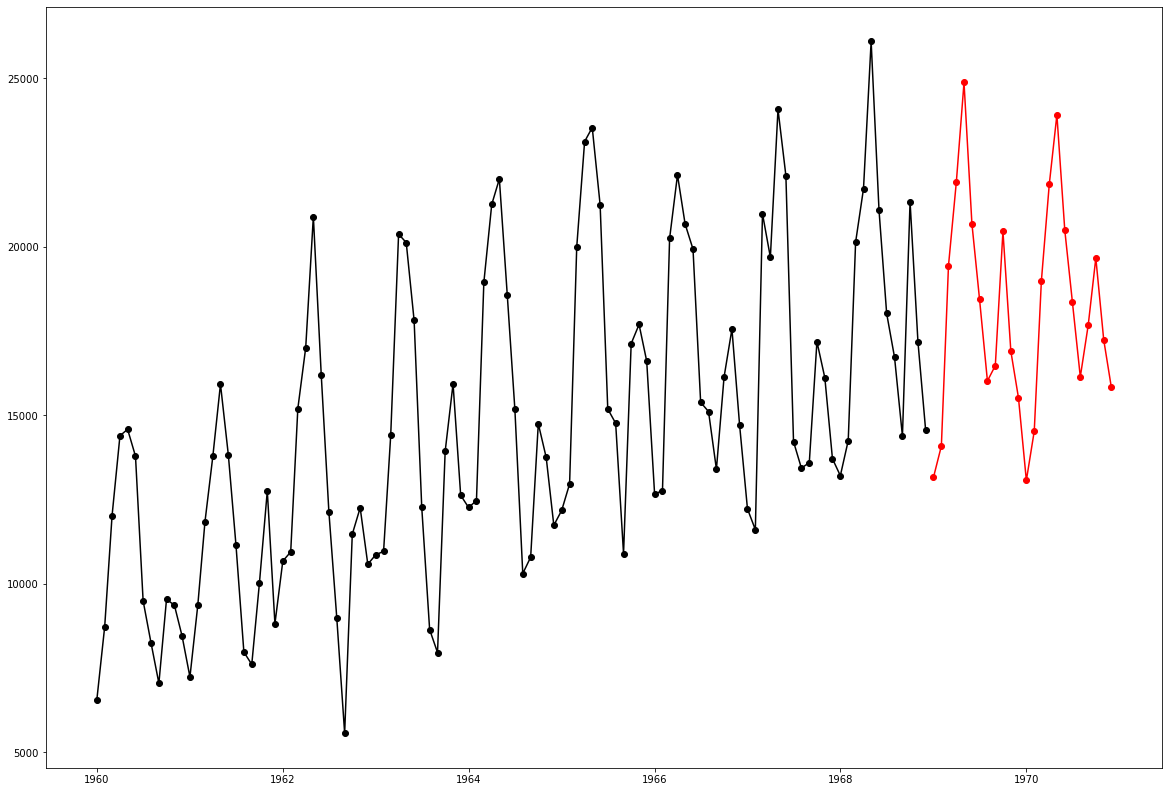

In [112]:
df_new = df.copy()

df_new['Month'] = pd.to_datetime(df_new['Month'])
    
df_new.reset_index(drop=True, inplace=True)
    
df_new = df_new.set_index('Month')

print(df_new)
    
plt.figure(figsize=(20, 14))

x, = plt.plot(df_new['Sales'], marker='o', color='black')

#y, = plt.plot(df_new['predict'], marker='o', color='blue')

z, = plt.plot(forecast,marker='o',color='red')

#plt.xticks(rotation = 'vertical')

#plt.legend([x,z],['Original','Forecast'])

plt.show()